# Question 2
##  Prepare a classification model using SVM for salary data 

Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
saltrain = pd.read_csv('D:\\Data Science\\Assignment 17\\Raw data\\SalaryData_Train(1).csv')
saltest = pd.read_csv('D:\\Data Science\\Assignment 17\\Raw data\\SalaryData_Test(1).csv')

In [3]:
finaldf = saltrain.append(saltest)
finaldf.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
obj = finaldf.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for i in obj:
    saltrain[i] = le.fit_transform(saltrain[i])
    saltest[i] = le.fit_transform(saltest[i])

## EDA & Visualization

In [5]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
finaldf.duplicated().value_counts()

False    39239
True      5982
dtype: int64

In [7]:
finaldf = finaldf.drop_duplicates()
finaldf.shape

(39239, 14)

In [8]:
saltest = saltest.drop_duplicates()
saltrain = saltrain.drop_duplicates()

<AxesSubplot:>

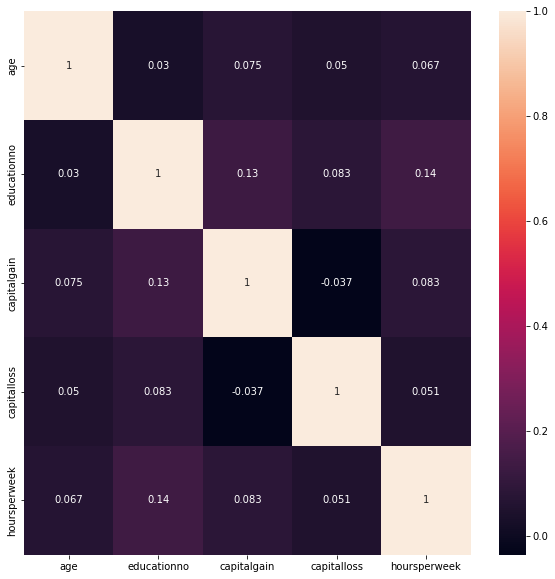

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(finaldf.corr(),annot=True)

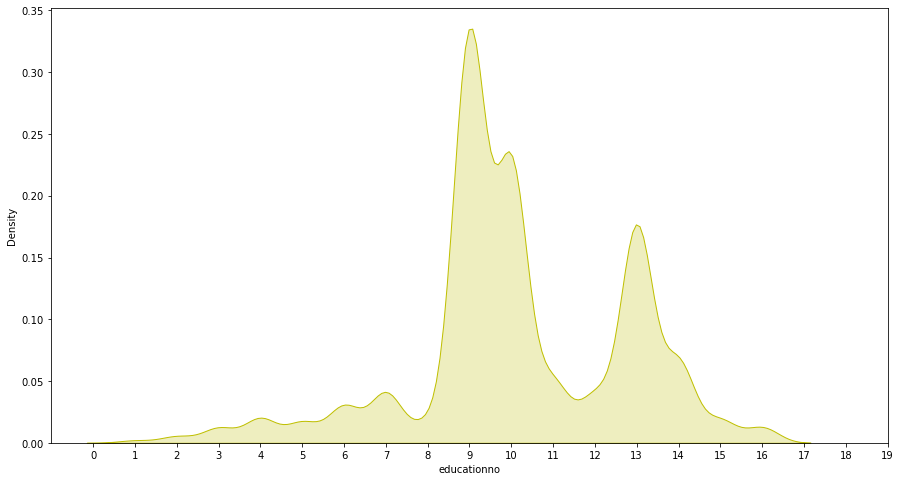

In [10]:
plt.figure(figsize=(15,8))
sns.kdeplot(saltest['educationno'],shade=True, color='y')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### Most of the people have Education years between 8 to 11.

In [11]:
obj

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

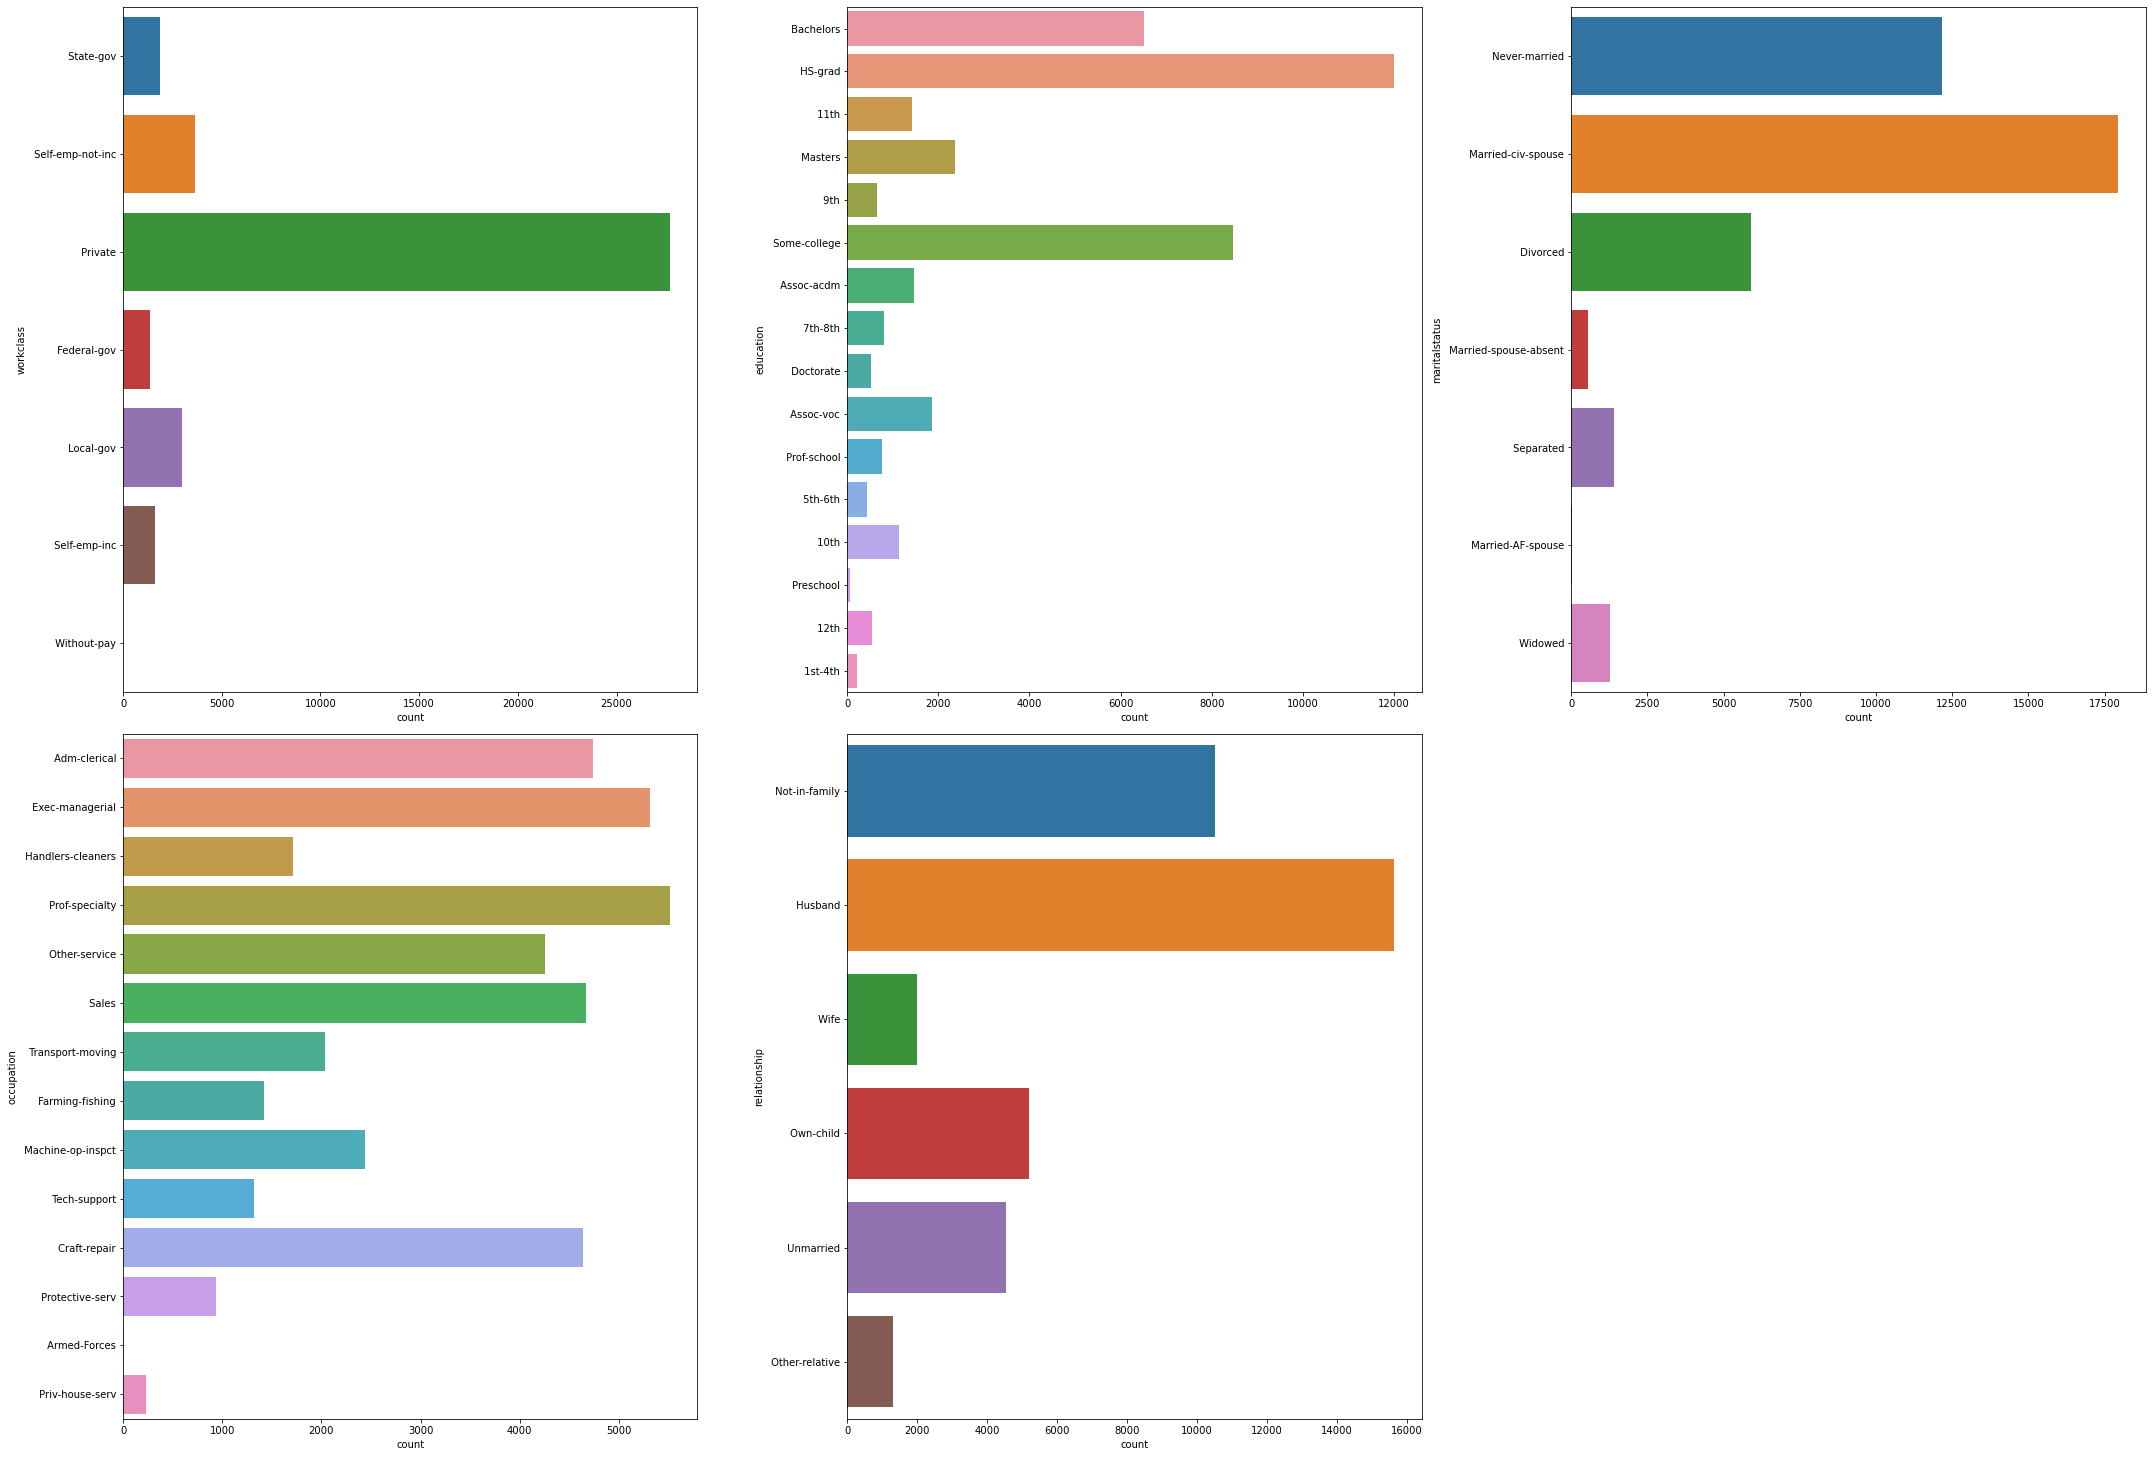

In [12]:
plt.figure(figsize=(30,30))
for i,col in enumerate(obj[:5],1):
    plt.subplot(3,3,i)
    sns.countplot(data=finaldf,y=col)
plt.tight_layout()
plt.show()

### People prefer private comapany more than others.
### Most people have Higher graduation and some college degree as its Important to get Job in Private comapnies nowadays.
### Maritial status of most people are civilian spouse(Married-civ-spouse).

In [13]:
num = finaldf.select_dtypes(exclude='object').columns.tolist()
num

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

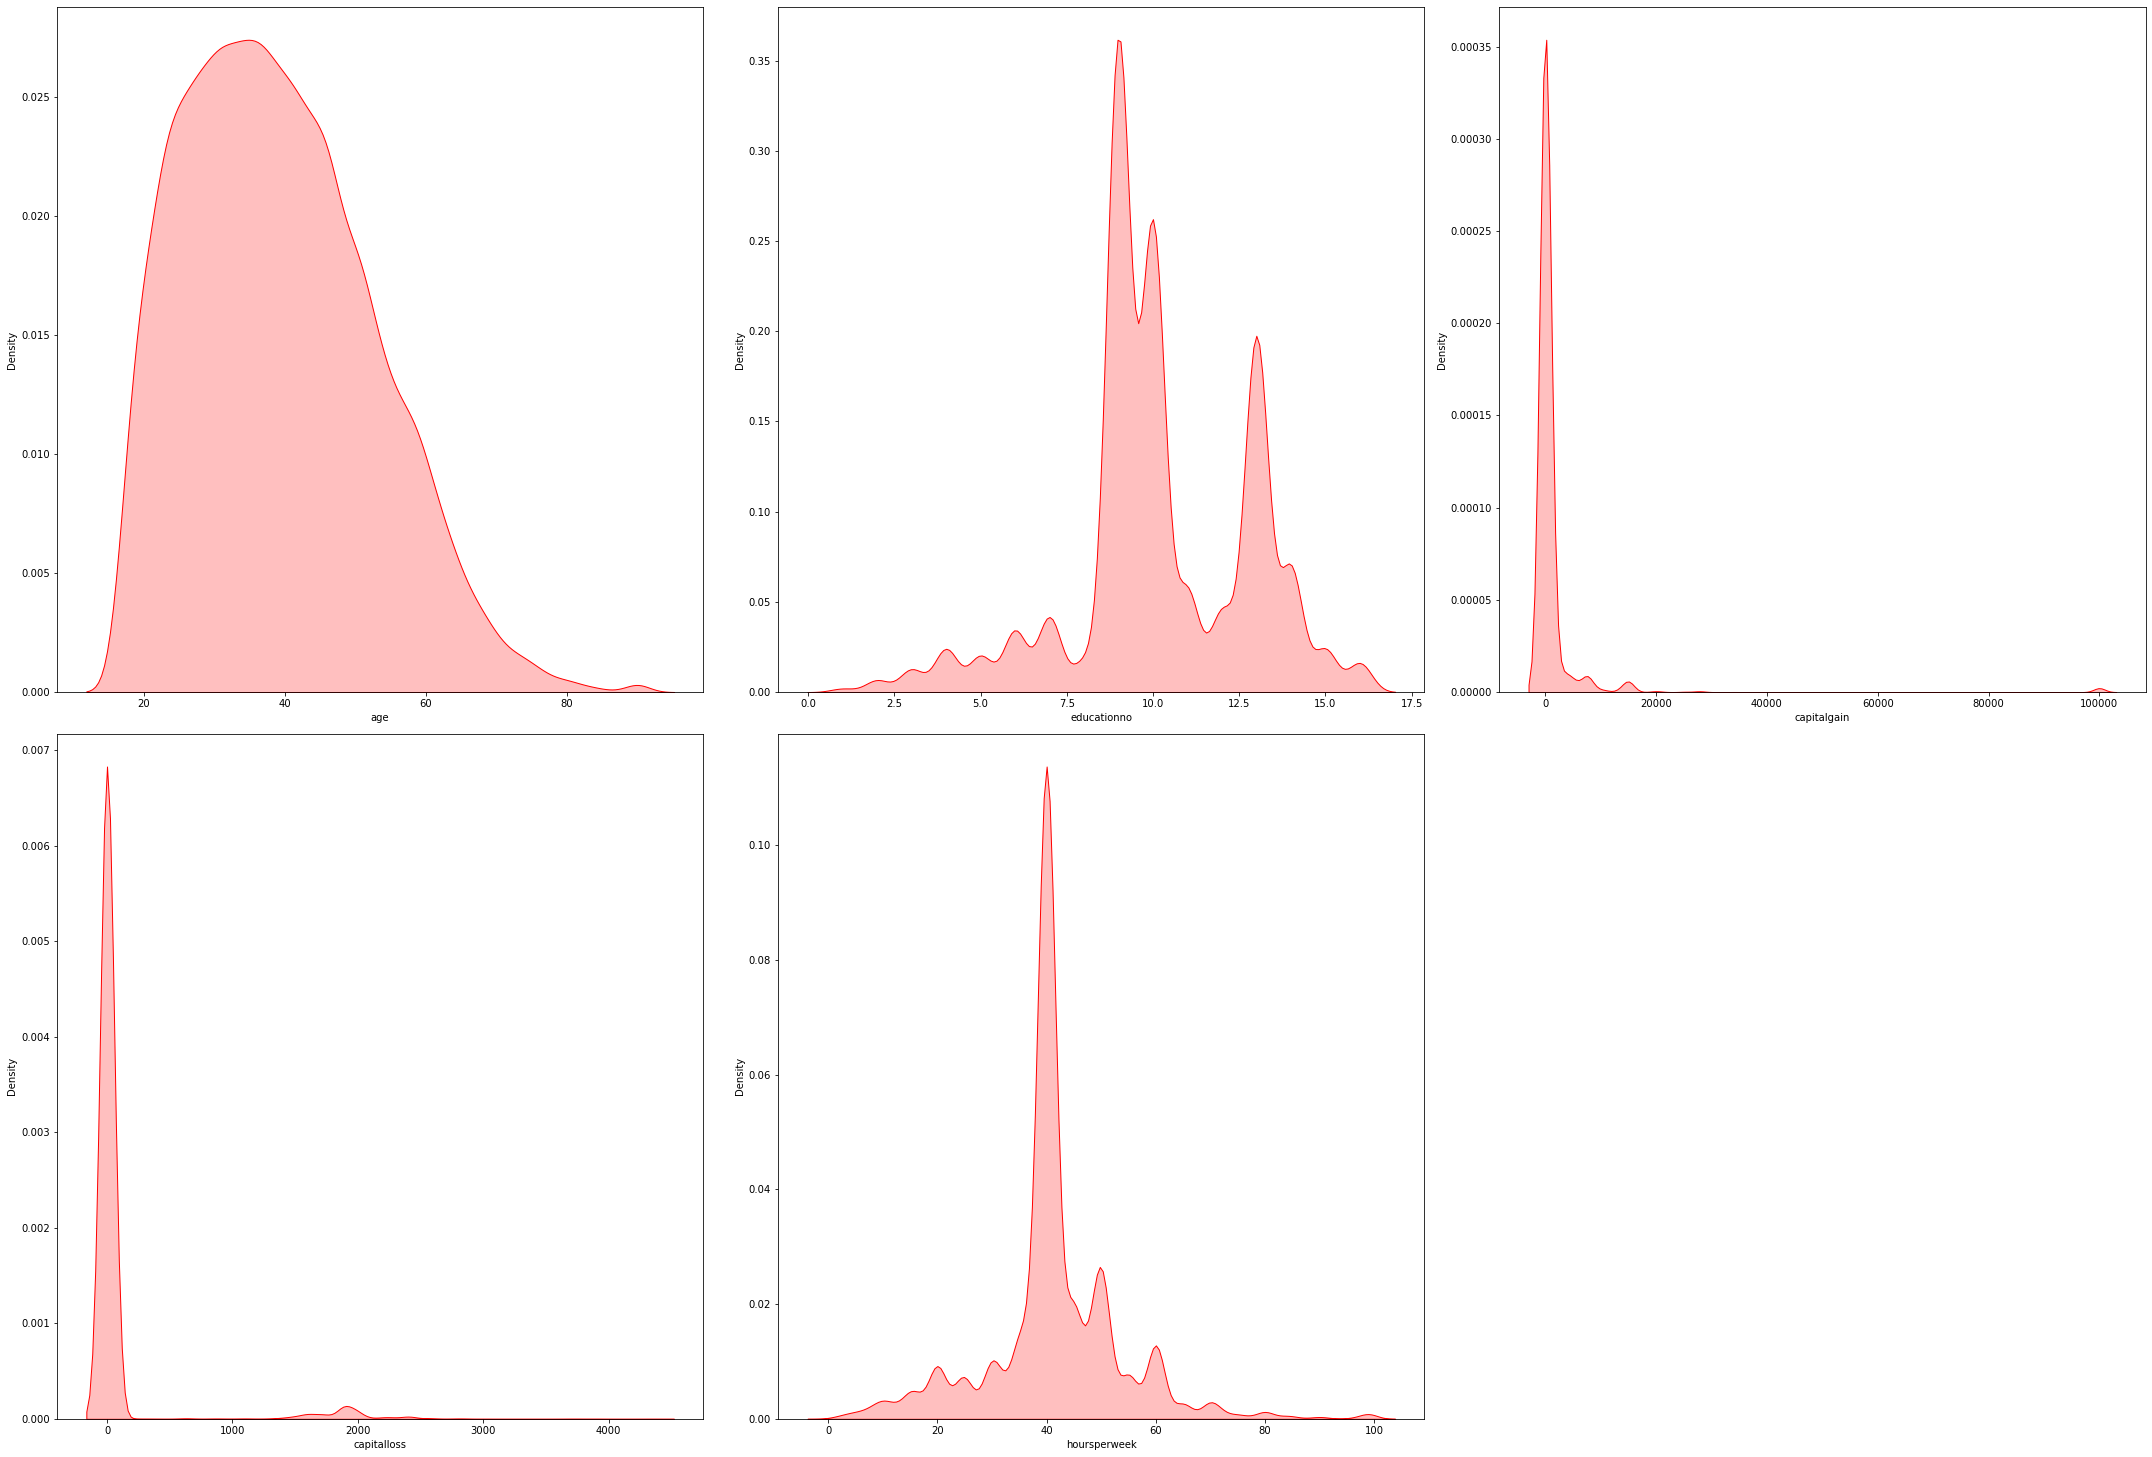

In [14]:
plt.figure(figsize=(30,30))
for i,col in enumerate(num,1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=saltrain,x=col,shade=True,color='r')
plt.tight_layout()
plt.show()

- Age of people are mostly between 20 to 70.
- Most of the people work for 40 hours per week.

## Model Building - SVM

In [15]:
xtrain = saltrain.iloc[:,:13]
ytrain = saltrain.iloc[:,13]
xtest = saltest.iloc[:,:13]
ytest = saltest.iloc[:,13]

In [16]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

## SVM Linear Model

In [17]:
model_lin = SVC(kernel = "linear")

In [18]:
model_lin.fit(xtrain,ytrain)

SVC(kernel='linear')

In [19]:
ylin = model_lin.predict(xtest)
ylin

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
accuracy_score(ytest,ylin)

0.8046709129511678

In [21]:
confusion_matrix(ytest,ylin)

array([[10277,   343],
       [ 2417,  1093]], dtype=int64)

## SVM RBF Model

In [22]:
model_rbf = SVC(kernel='rbf')

In [23]:
model_rbf.fit(xtrain,ytrain)

SVC()

In [24]:
yrbf = model_rbf.predict(xtest)
yrbf

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
accuracy_score(ytest,yrbf)

0.8440198159943383

In [26]:
confusion_matrix(ytest,yrbf)

array([[9995,  625],
       [1579, 1931]], dtype=int64)

## SVM Polynomial Model

In [27]:
model_poly = SVC(kernel='poly')

In [28]:
model_poly.fit(xtrain,ytrain)

SVC(kernel='poly')

In [29]:
ypoly = model_poly.predict(xtest)
ypoly

array([0, 0, 0, ..., 1, 0, 1])

In [30]:
accuracy_score(ytest,ypoly)

0.8371549893842888

In [31]:
confusion_matrix(ytest,ypoly)

array([[10089,   531],
       [ 1770,  1740]], dtype=int64)

## SVM Sigmoid Model

In [32]:
model_sig = SVC()

In [33]:
model_sig.fit(xtrain,ytrain)

SVC()

In [34]:
ysig = model_sig.predict(xtest)
ysig

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
accuracy_score(ytest,ysig)

0.8440198159943383

In [36]:
confusion_matrix(ytest,ysig)

array([[9995,  625],
       [1579, 1931]], dtype=int64)

## Model Interpretation
- RBF and Sigmoid Model gives the best accuracy